In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append("../lib/")
sys.path.append("../pol_est_sim/")
import get_speed_data
import area_speed_vis
import get_trips_distribution
import fit_speed_load_rela
import simu_traffic
import simu_result_show
import get_dis_after_policy
import random_ind_pol_simu
from datetime import datetime, timezone, timedelta
from matplotlib import ticker
import copy
import utils
import time, datetime
import importlib
importlib.reload(get_speed_data)
importlib.reload(area_speed_vis)
importlib.reload(utils)
importlib.reload(get_trips_distribution)
importlib.reload(fit_speed_load_rela)
importlib.reload(simu_traffic)
importlib.reload(simu_result_show)
importlib.reload(get_dis_after_policy)
importlib.reload(random_ind_pol_simu)

<module 'random_ind_pol_simu' from '../pol_est_sim\\random_ind_pol_simu.py'>

# 1.Building the relationship between speed and network load

## 1.1 Visualization of speed and network load

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


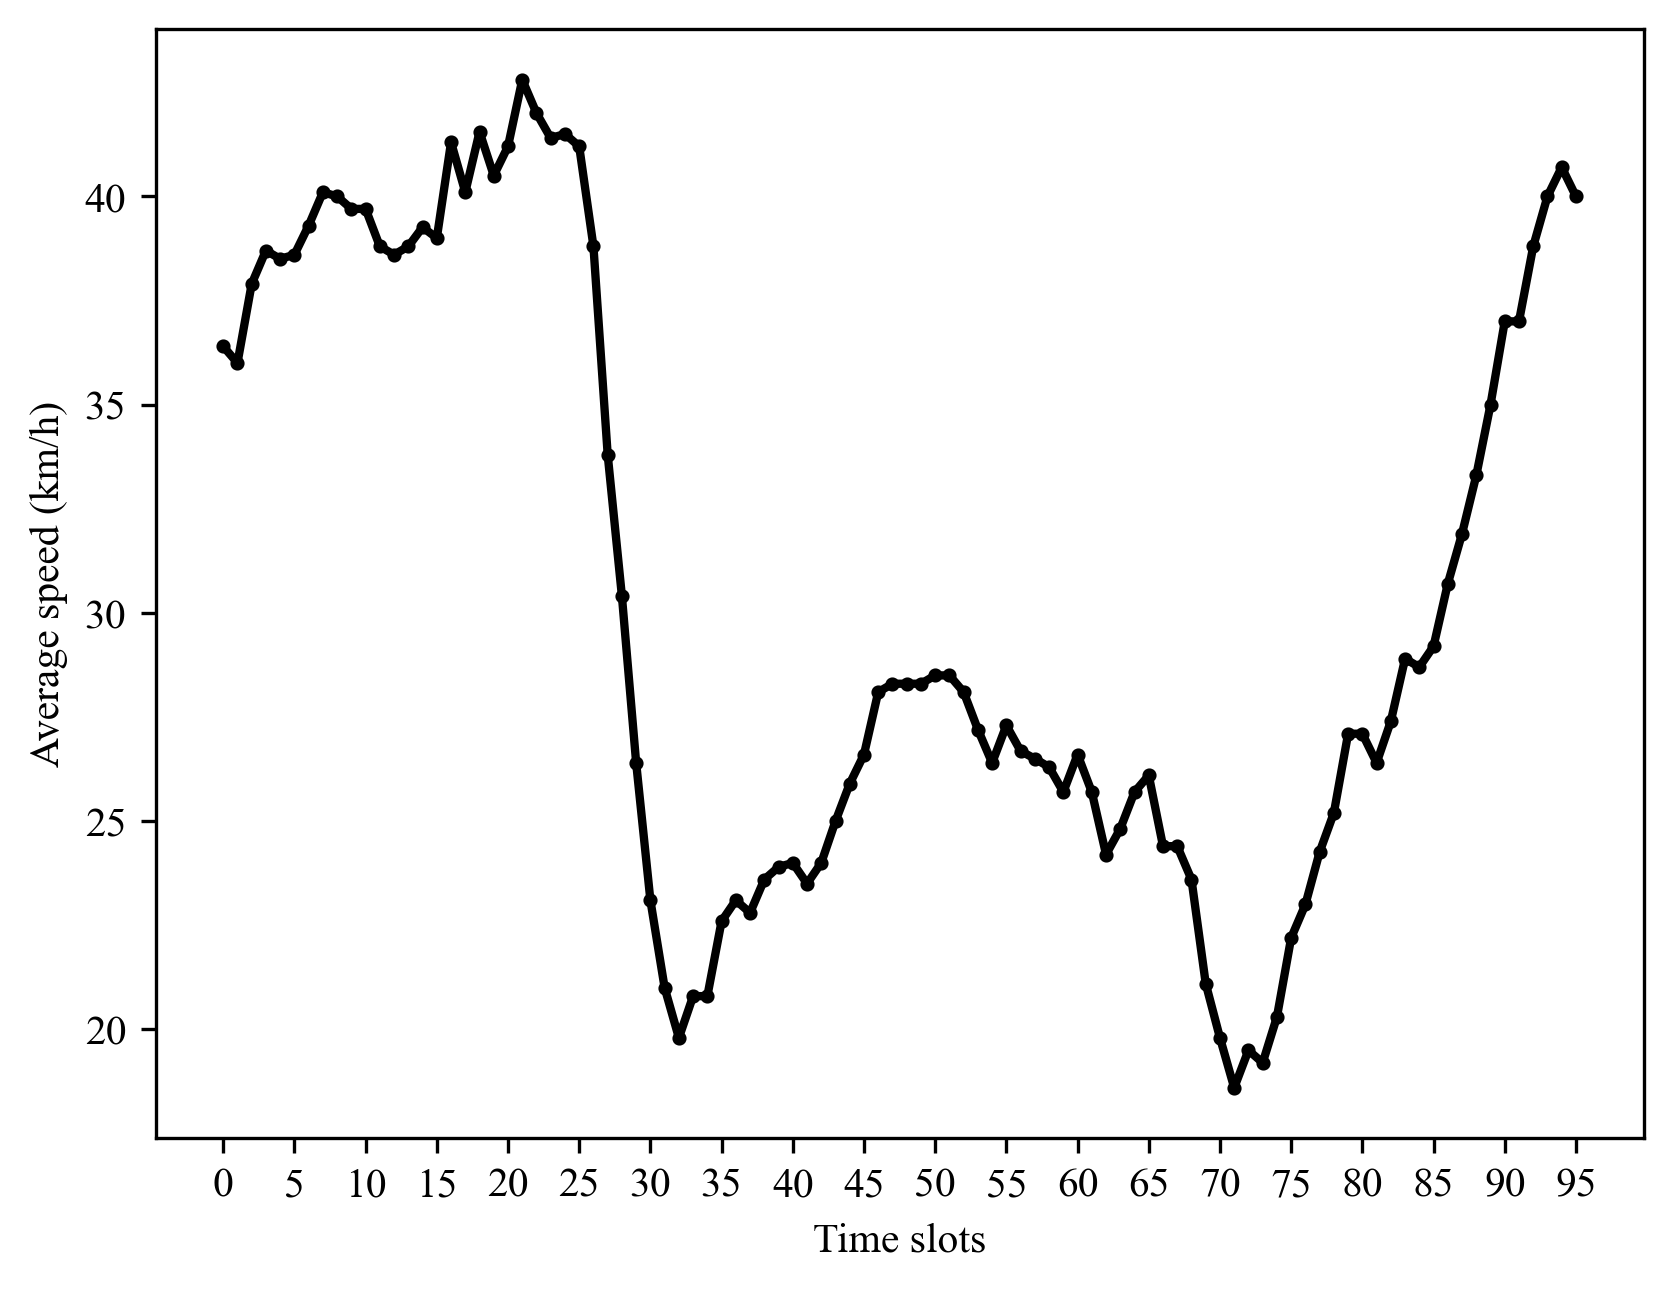

In [7]:
area_speed_vis.vis.speed_vis(speed_file="../../data/speedfile/speed_0425.csv")

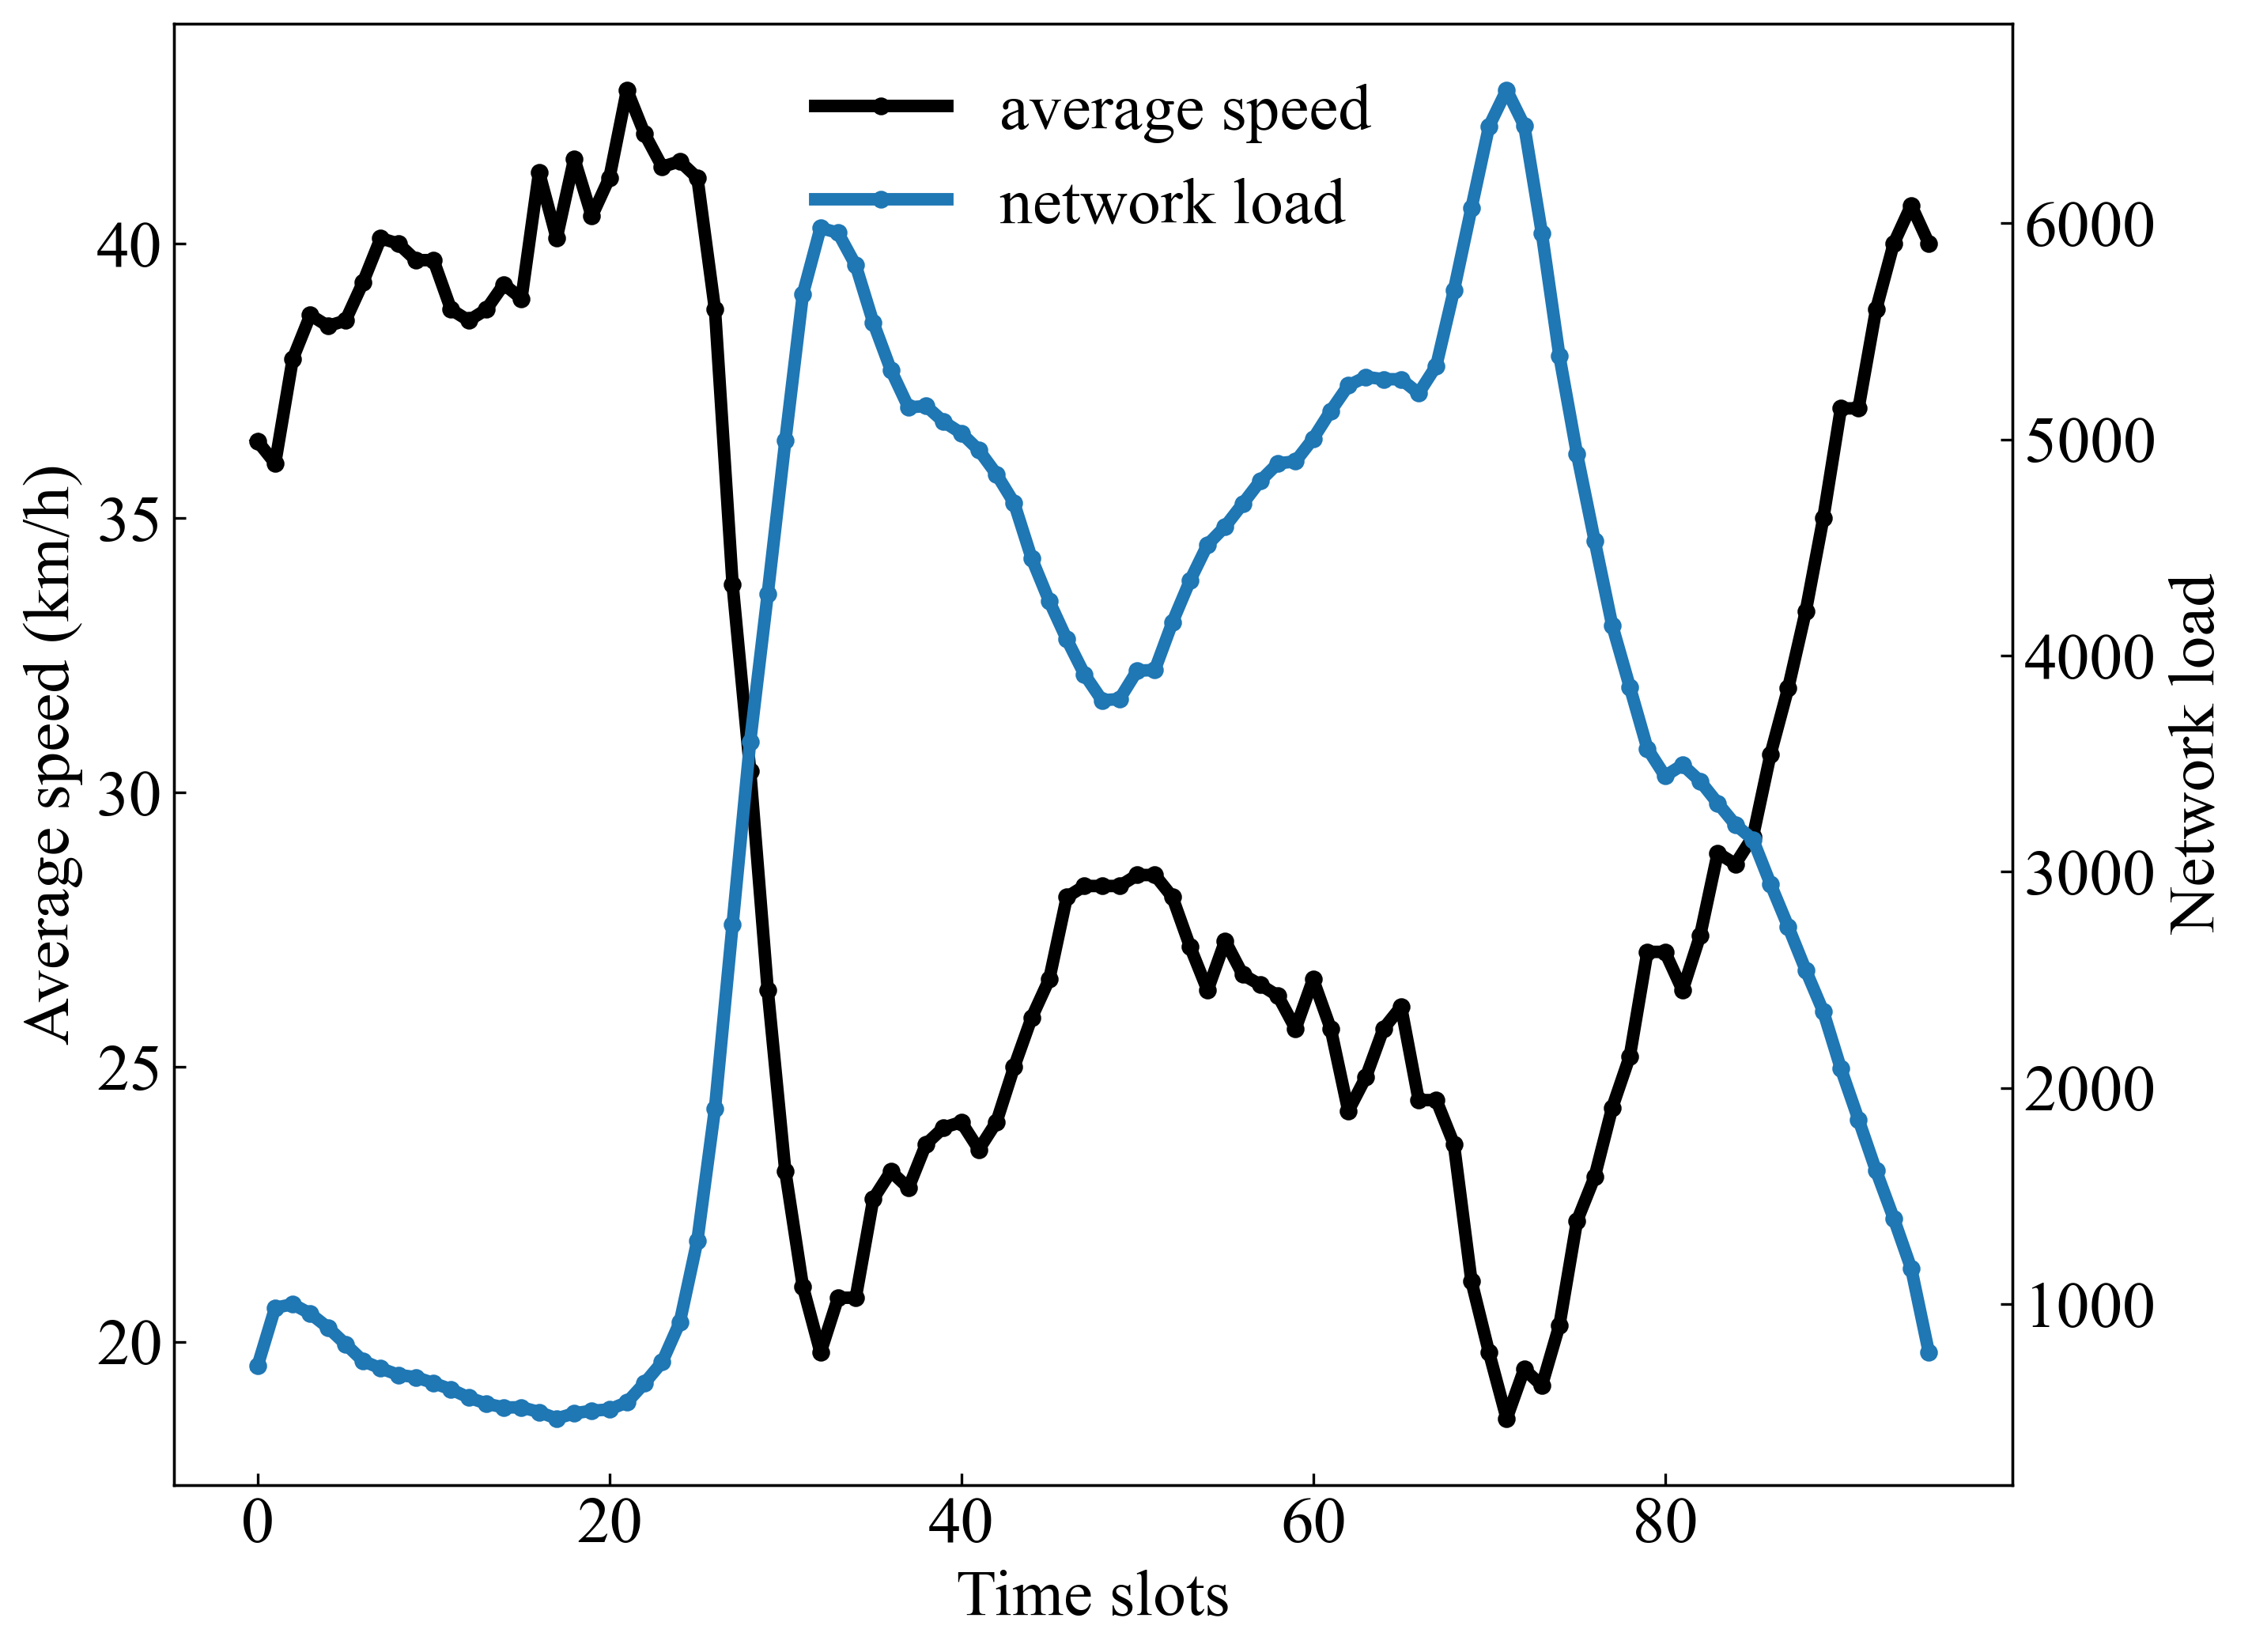

In [8]:
area_speed_vis.vis.speed_load_vis(speed_file="../../data/speedfile/speed_0425.csv",
                       load_file="../../data/networkload_0425.csv",
                       data_save_file="../../data/speed_load_data/speed_load_data_0425.csv")

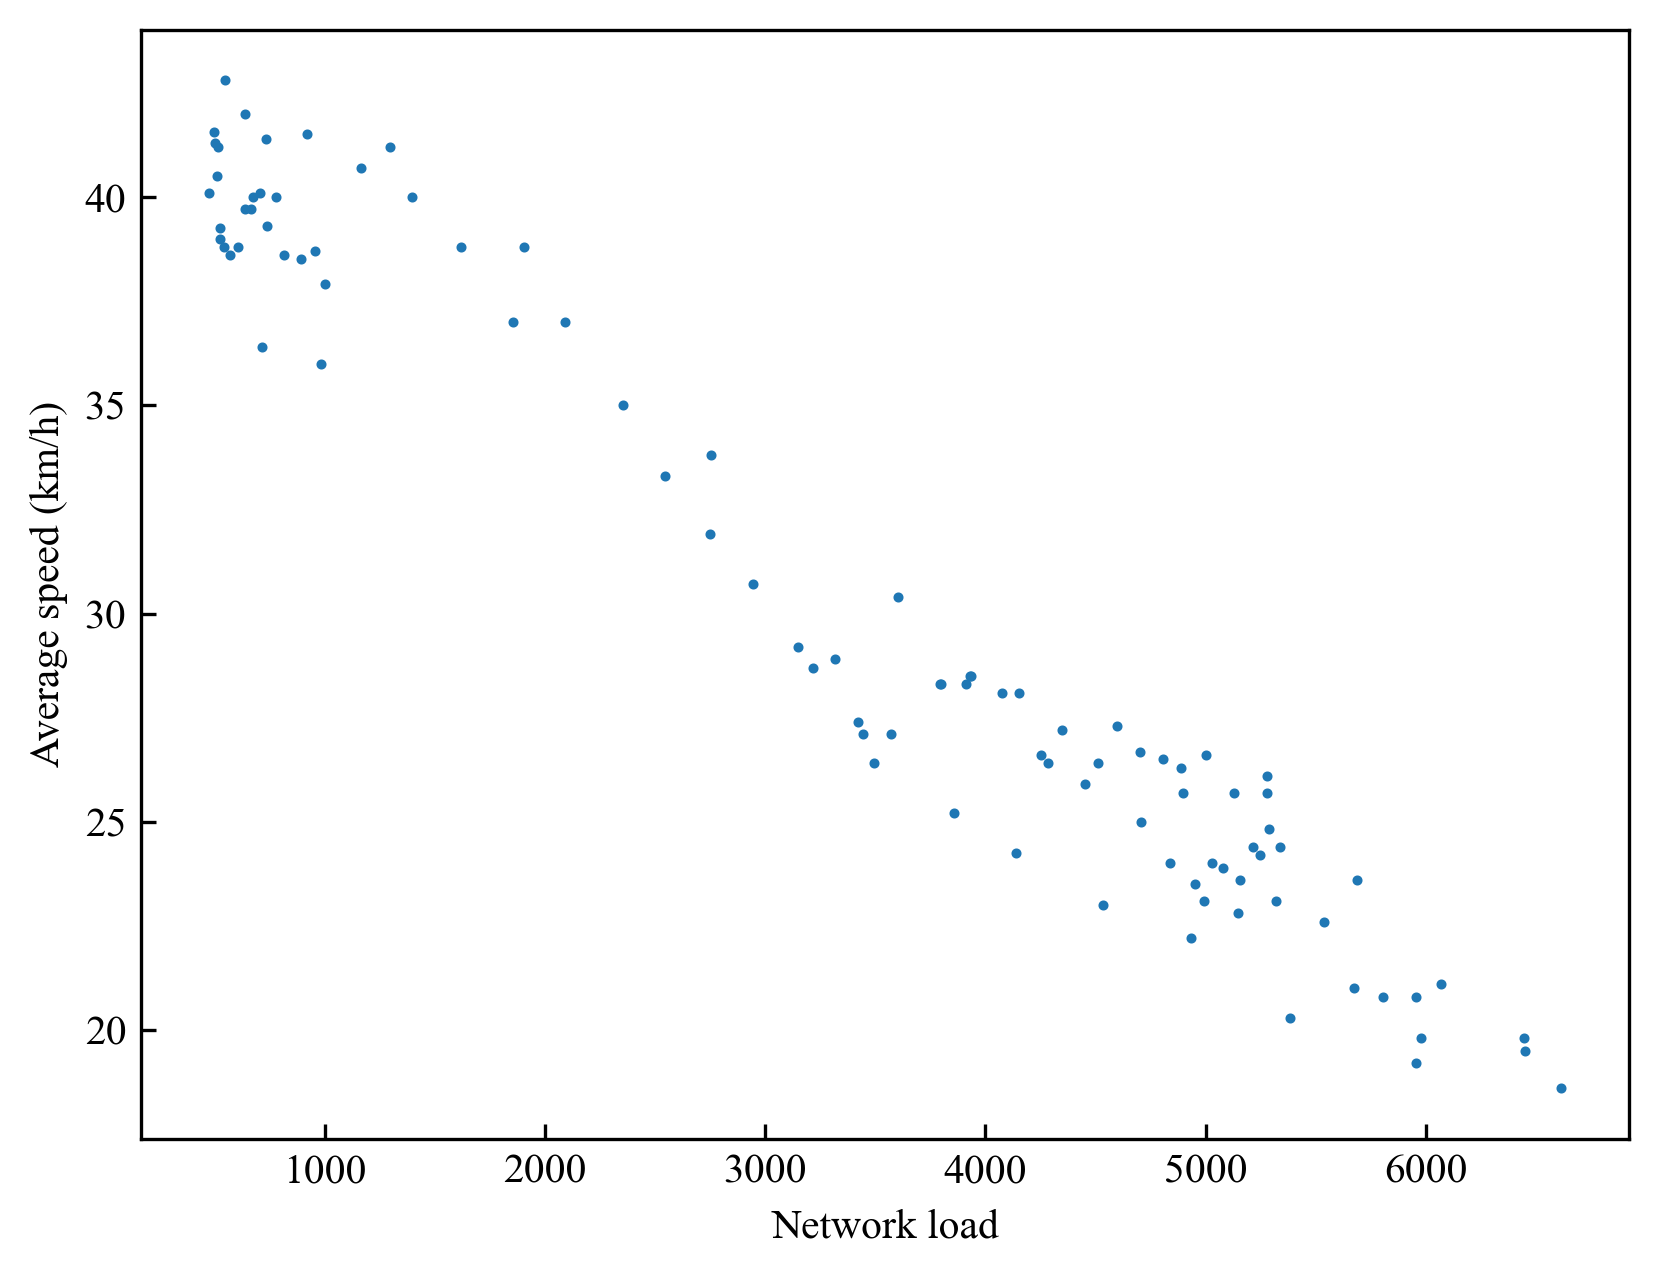

In [9]:
area_speed_vis.vis.speed_load_scatter(
    speed_load_file="../../data/speed_load_data/speed_load_data_0425.csv")

## 1.2.Fitting the relationship between speed and network load
### 1.2.1 newell model

拟合得到的系数依次为: [3.98669725e+01 2.09197201e+05 4.04048524e+04]


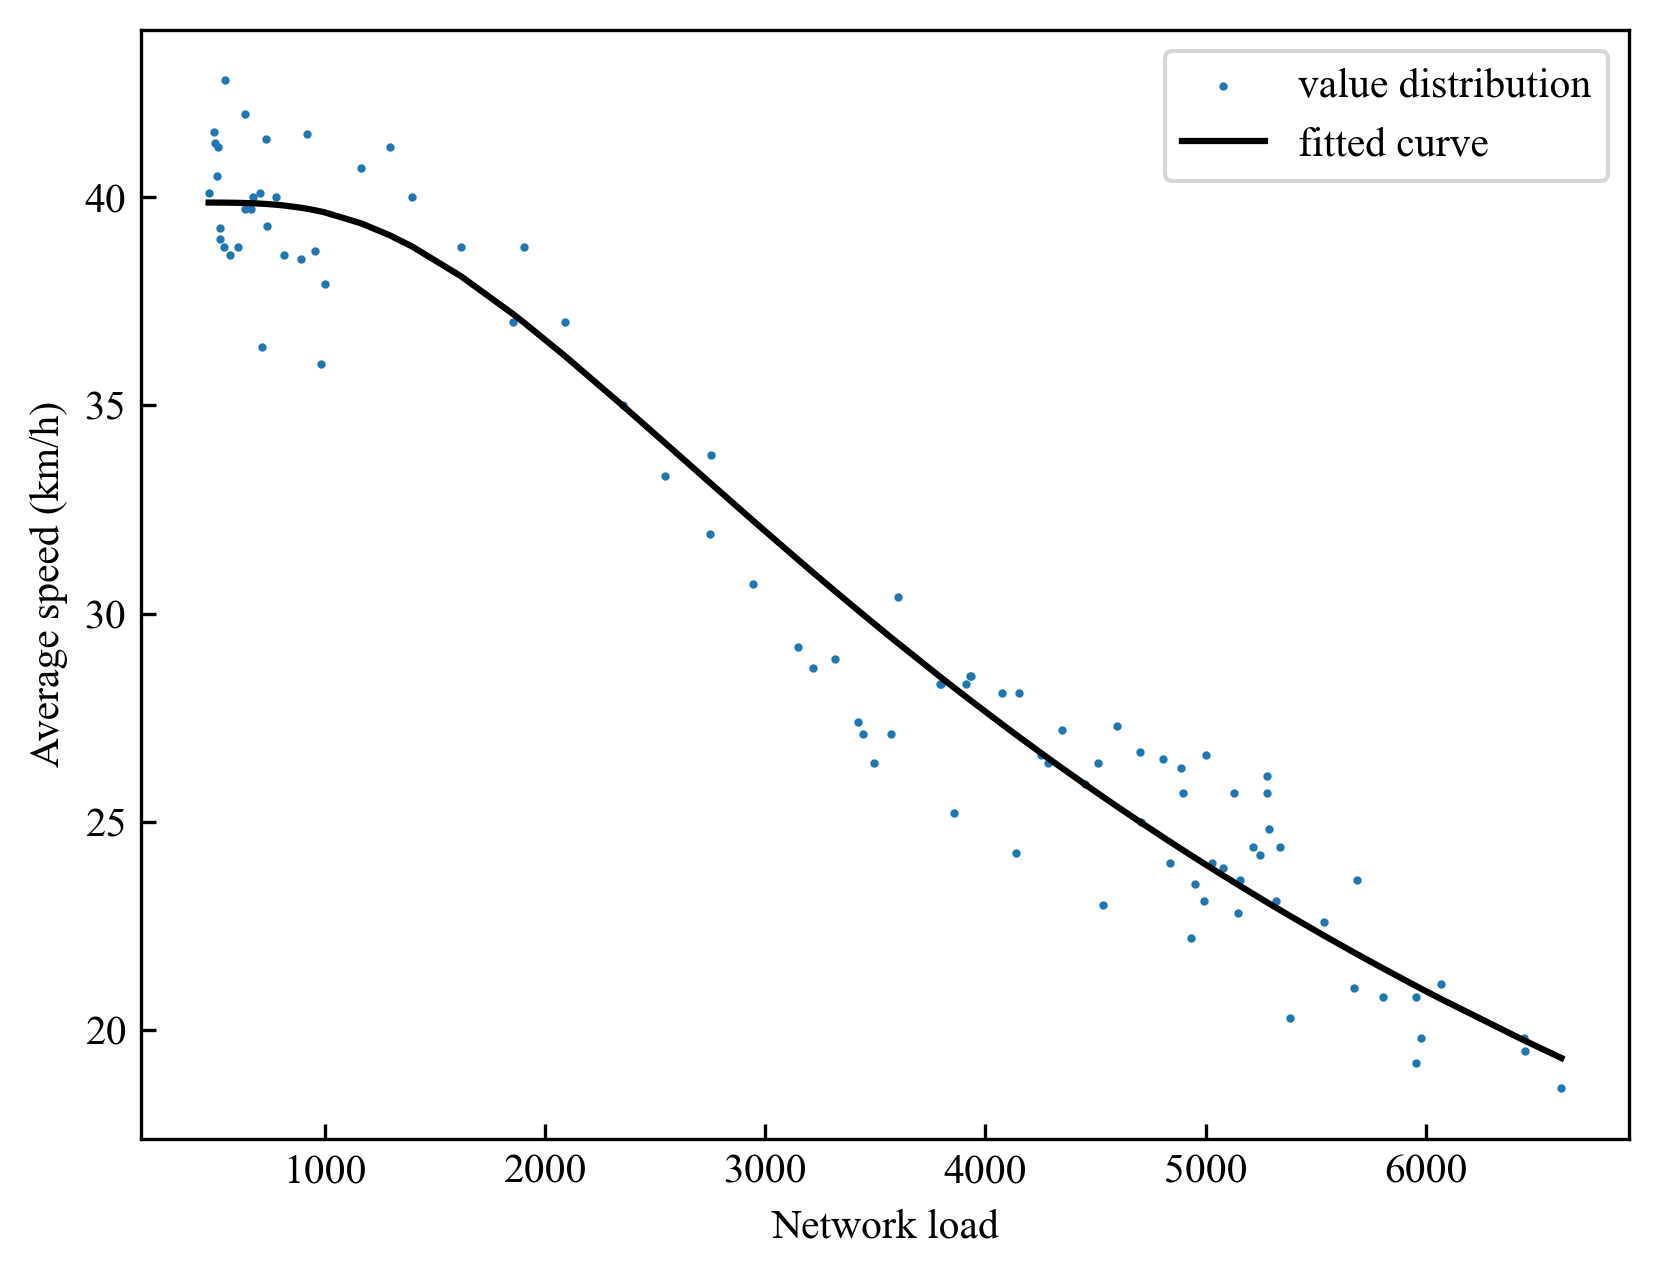

In [10]:
popt1 = fit_speed_load_rela.fit.start(data_file="../../data/speed_load_data/speed_load_data_0425.csv",
                  fit_result_save_file="../../data/simu_pol_eva_data/mfdresult_newell.npy",
                  func=utils.newell_model,bounds=([20,0,1000],[80,10000000,100000]))
# print(newell_model(np.array([0],dtype='float64'), popt1[0], popt1[1], popt1[2]))
fit_speed_load_rela.fit.plot_result(data_file="../../data/speed_load_data/speed_load_data_0425.csv",
                popt1=popt1,func=utils.newell_model)

# 2.Travel distribution regarding departure time and free travel time

## 2.1 Calculate the free travel time for each trip

In [11]:
get_trips_distribution.trips_dis.get_free_speed_trip_file(OD_file="../../data/ODFile/OD_425_10_percent.csv",
               speed_file="../../data/speedfile/speed_0425.csv",
               free_speed=39.80,output_file="../../data/simu_pol_eva_data/OD_with_freespeed_0425.csv",
               ts=15)

## 3.2 Obtain travel distribution regarding departure time and free travel time

In [12]:
get_trips_distribution.trips_dis.get_distribution(OD_file_free_speed="../../data/simu_pol_eva_data/OD_with_freespeed_0425.csv",
                    ts=15,trip_distribution_file="../../data/simu_pol_eva_data/trip_distribution_0425.npy")

# 4.Simulation

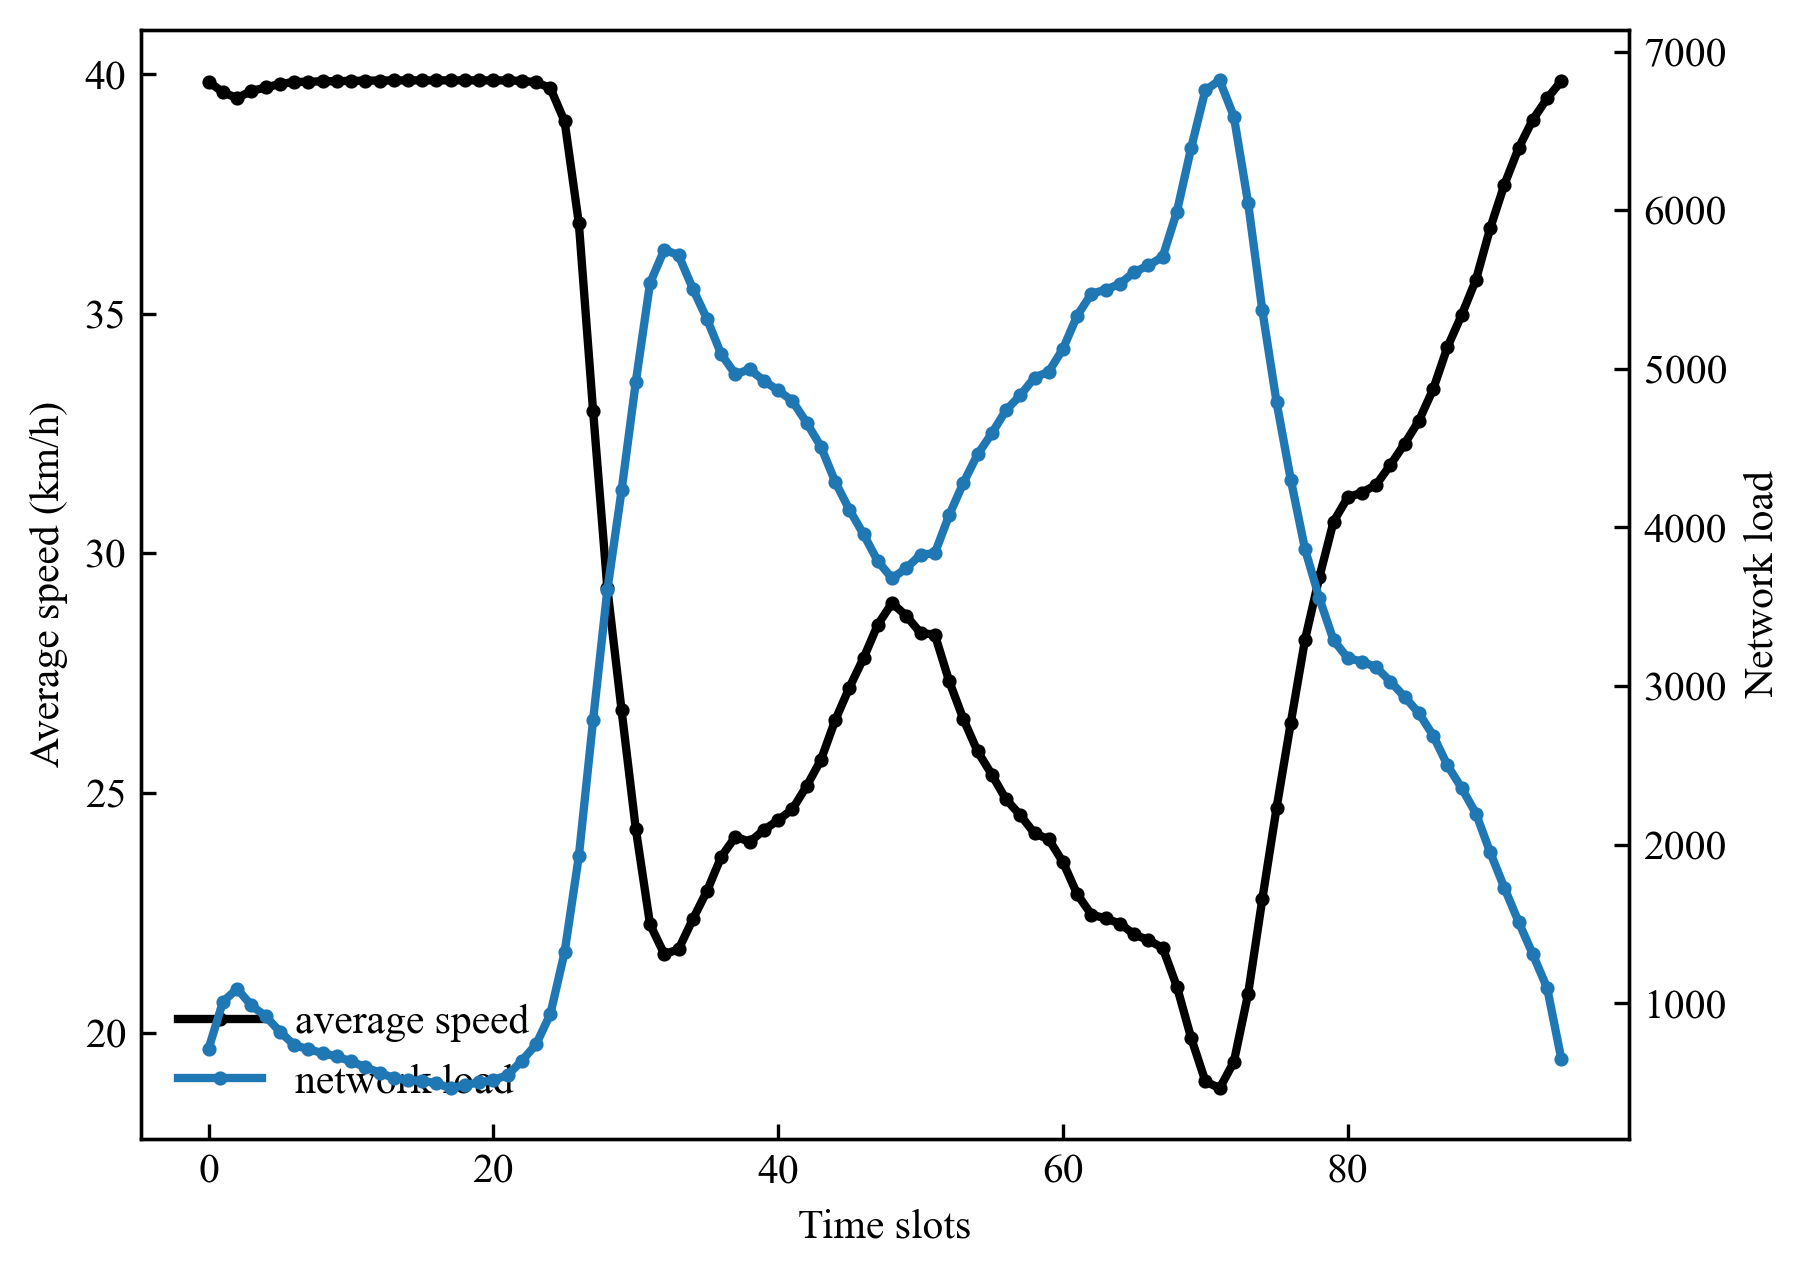

In [13]:
simu_obj = simu_traffic.simu(trip_dis_file="../../data/simu_pol_eva_data/trip_distribution_0425.npy",
               v_n_rela_file="../../data/simu_pol_eva_data/mfdresult_newell.npy",
               free_speed=39.80,ts=15)
simu_obj.traffic_simu()
simu_obj.plot(data_save_file="../../data/simu_pol_eva_data/SimulationHangzhouTrafficState.csv")

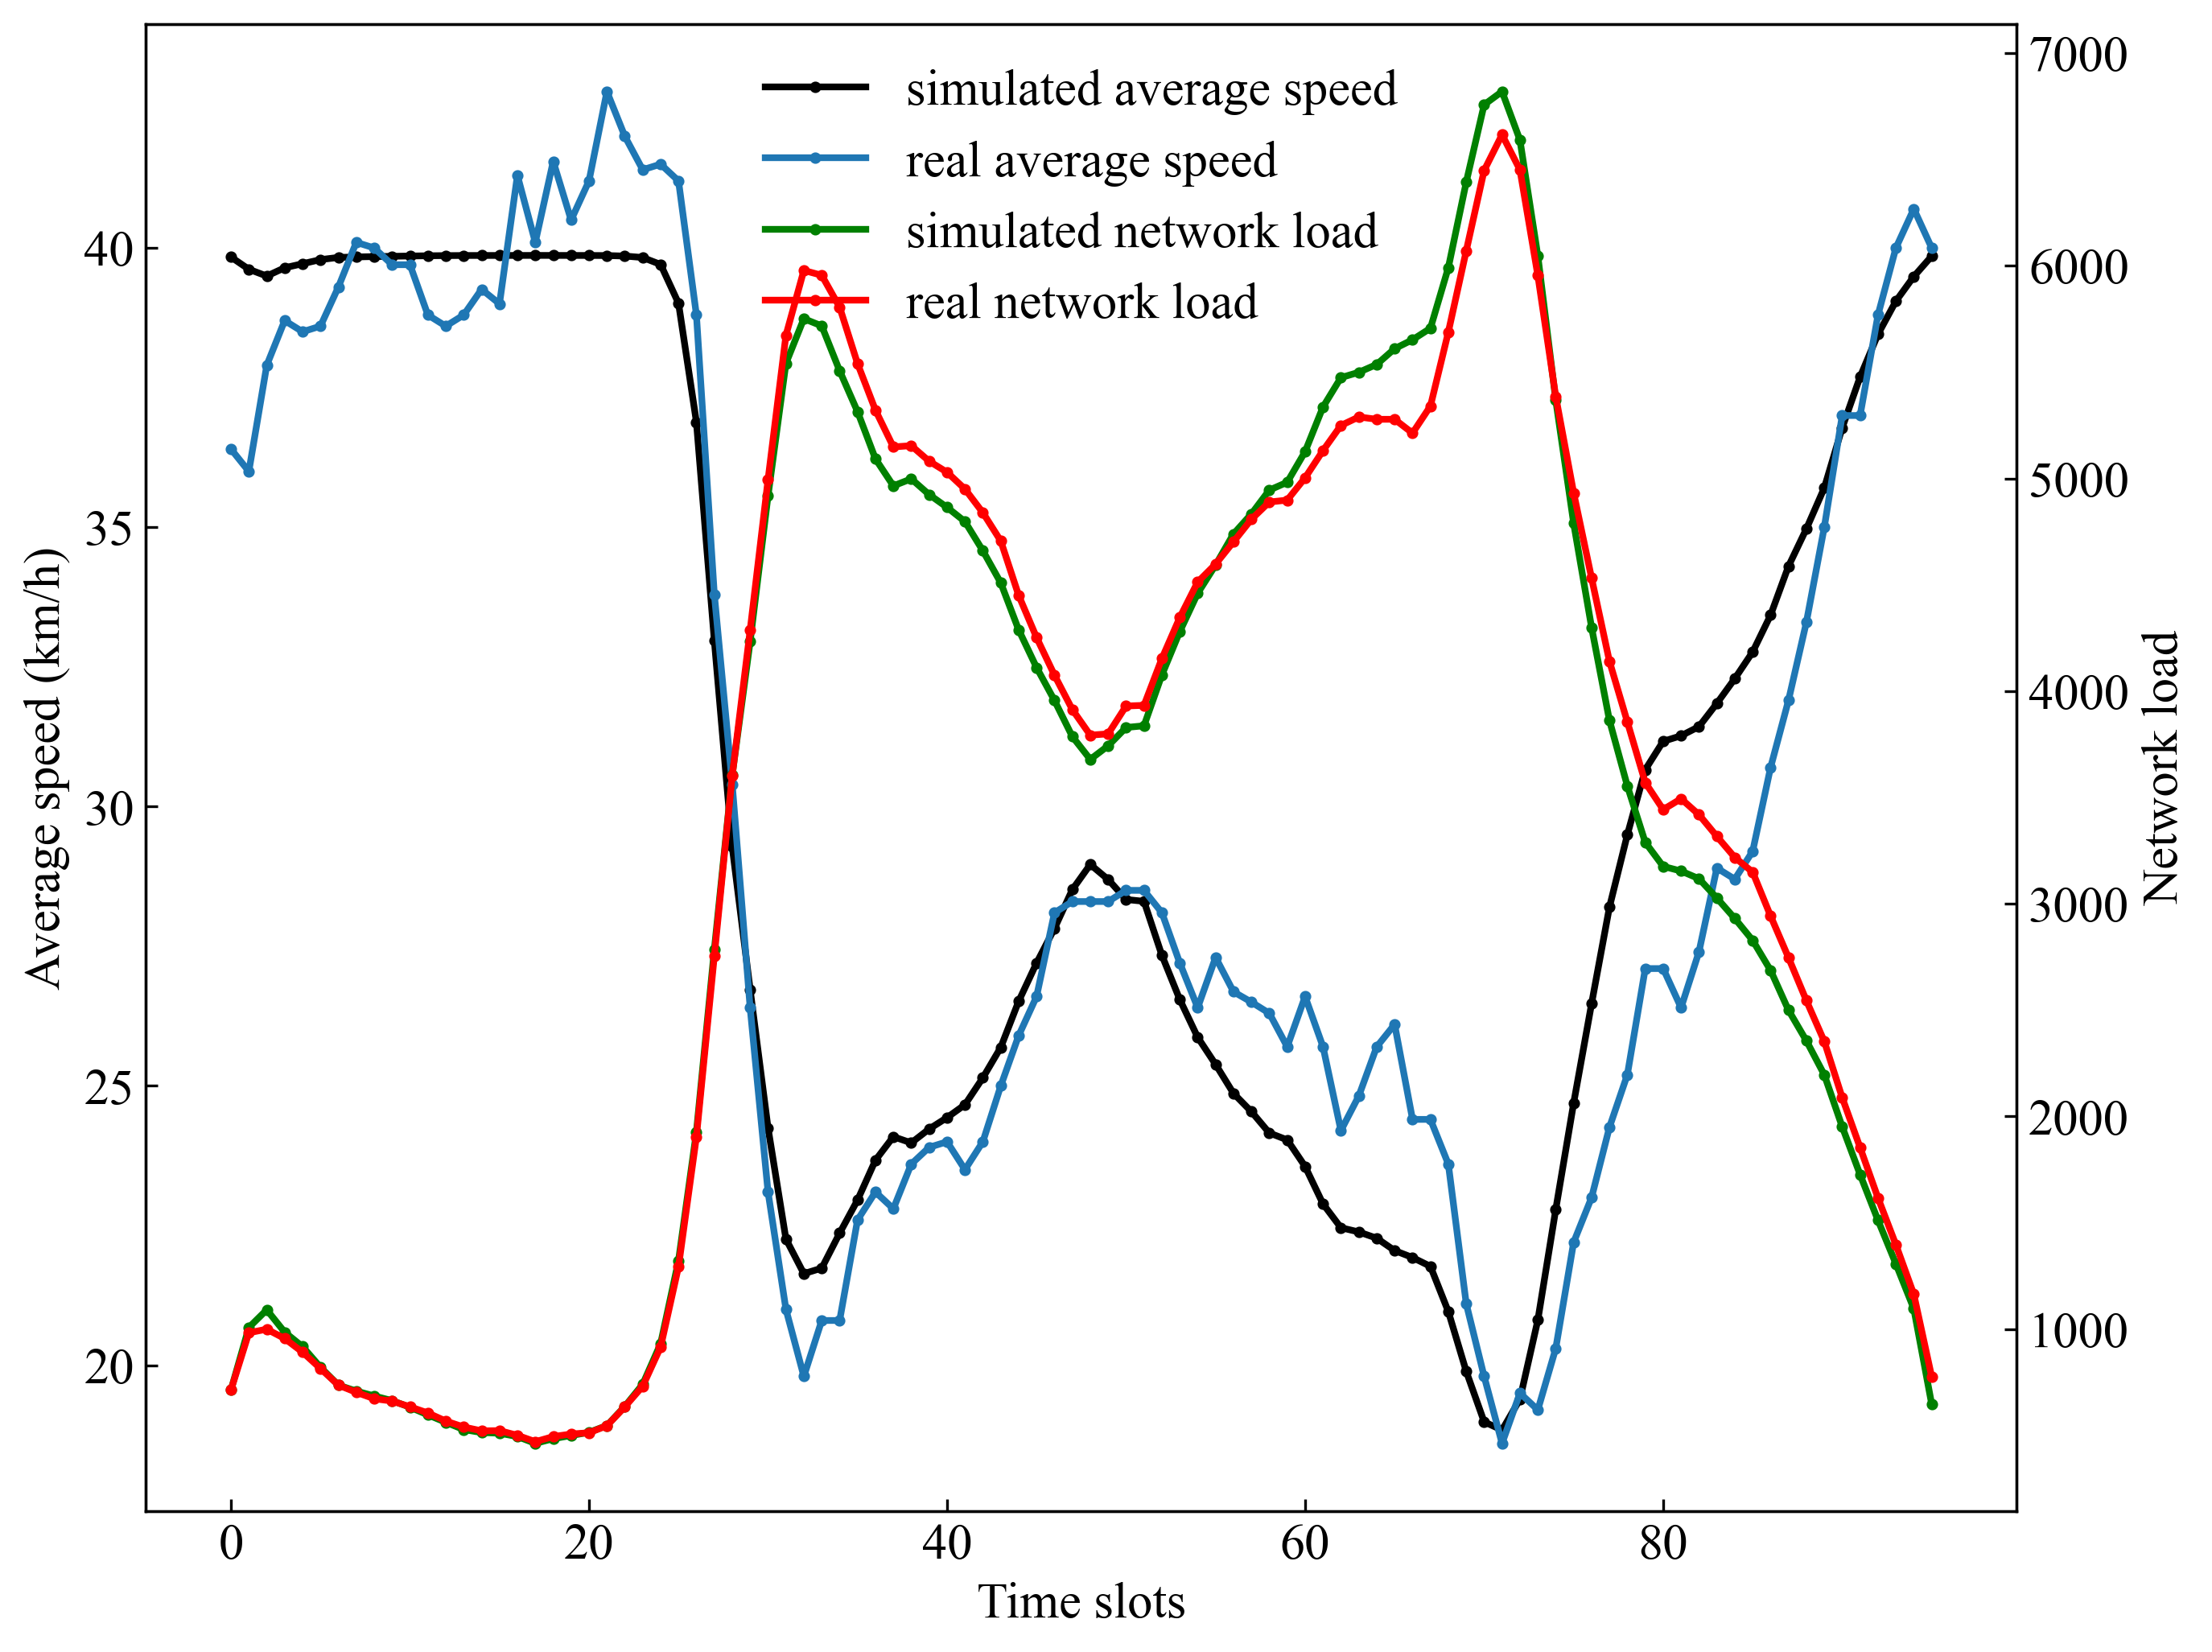

In [14]:
simu_result_show.plot_show.simu_real_data_show(simu_result_file="../../data/simu_pol_eva_data/SimulationHangzhouTrafficState.csv",
                    real_data_file="../../data/speed_load_data/speed_load_data_0425.csv")